#### Abstract
The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

#### Load Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Dataset

In [12]:
data = pd.read_csv('Wholesale_customers_data.csv')
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


Attribute Information:

1. FRESH: annual spending (m.u.) on fresh products (Continuous)
2. MILK: annual spending (m.u.) on milk products (Continuous)
3. GROCERY: annual spending (m.u.)on grocery products (Continuous)
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)
7. CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
8. REGION: customers Region Lisbon, Pporto or Other (Nominal)

#### Basic Information about the dataset

In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
data.shape

(440, 8)

In [11]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

#### Data Analysis

In [29]:
data1 = data.copy()

##### Question 1: Replace of the columns Region and Channel to the corresponding names

In [32]:
# Replace the number of the Region column with the corresponded name
#data1['Region'] = data1['Region'].map({1: 'Lisbon', 2: 'Porto', 3: 'Other Region'})

# Replace the number of the Channel column with the corresponded name
#data1['Channel'] = data1['Channel'].map({1: 'Horeca', 2: 'Retail'})

In [33]:
data1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other Region,12669,9656,7561,214,2674,1338
1,Retail,Other Region,7057,9810,9568,1762,3293,1776
2,Retail,Other Region,6353,8808,7684,2405,3516,7844
3,Horeca,Other Region,13265,1196,4221,6404,507,1788
4,Retail,Other Region,22615,5410,7198,3915,1777,5185


##### Question 2: Create a new column with the total amount of annual spendings for each client

In [42]:
data1['Total'] = data1.iloc[:,2:].sum(axis = 1)

In [43]:
data1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,Retail,Other Region,12669,9656,7561,214,2674,1338,34112.0
1,Retail,Other Region,7057,9810,9568,1762,3293,1776,33266.0
2,Retail,Other Region,6353,8808,7684,2405,3516,7844,36610.0
3,Horeca,Other Region,13265,1196,4221,6404,507,1788,27381.0
4,Retail,Other Region,22615,5410,7198,3915,1777,5185,46100.0


##### Questions 3: Calculate the total amount of products for all clients

In [124]:
p = data1.iloc[:, 2:-2].sum(axis = 0)
p

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
dtype: int64

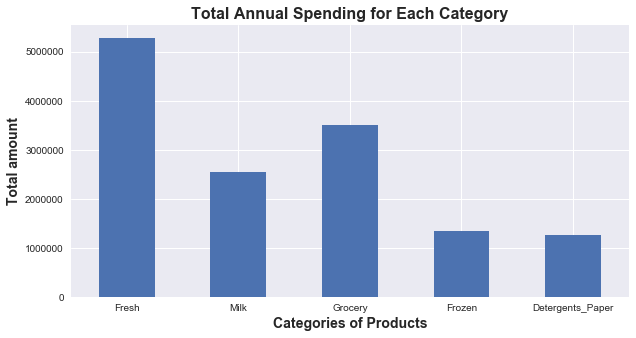

In [70]:
# Plotting the results
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

x.plot(kind = 'bar')
plt.xlabel('Categories of Products', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.title('Total Annual Spending for Each Category', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.xticks(rotation = 0)

plt.tight_layout
plt.show()

###### Analysis
It is clear that the most requared are fresh products. 

##### Question 4: Calculate and plot the ten top clients 

In [74]:
t = data1.sort_values('Total', ascending = False).head(10)
t

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
85,Retail,Other Region,16117,46197,92780,1026,40827,2944,199891.0
47,Retail,Other Region,44466,54259,55571,7782,24171,6465,192714.0
181,Horeca,Other Region,112151,29627,18148,16745,4948,8550,190169.0
183,Horeca,Other Region,36847,43950,20170,36534,239,47943,185683.0
61,Retail,Other Region,35942,38369,59598,3254,26701,2017,165881.0
86,Retail,Other Region,22925,73498,32114,987,20070,903,150497.0
325,Horeca,Porto,32717,16784,13626,60869,1272,5609,130877.0
333,Retail,Porto,8565,4980,67298,131,38102,1215,120291.0
23,Retail,Other Region,26373,36423,22019,5154,4337,16523,110829.0
211,Retail,Lisbon,12119,28326,39694,4736,19410,2870,107155.0


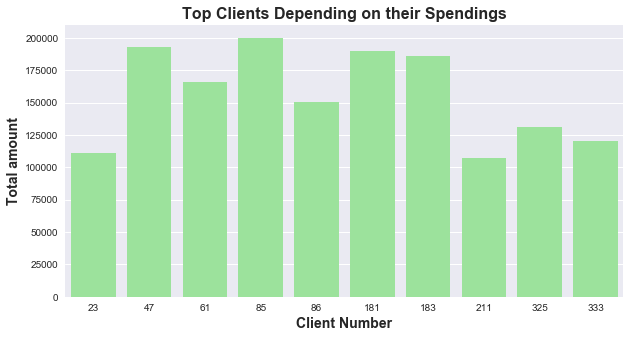

In [175]:
# Plotting the results
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

sns.barplot(t.index, t.Total, color='lightgreen', errwidth = True)
plt.xlabel('Client Number', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.title('Top Clients Depending on their Spendings', fontdict={'fontweight': 'bold', 'fontsize': 16})


plt.tight_layout
plt.show()

###### Analysis
The above plot shows the top clients depending on their annual spendings. There are four clients whose annual spendings are more than 175000euros.

##### Question 5: Which Channel spend more money?

Horeca    298
Retail    142
Name: Channel, dtype: int64 



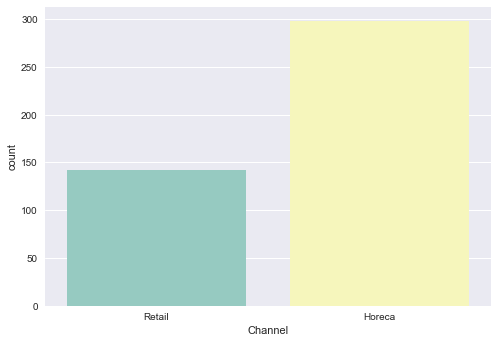

In [120]:
# Firstly, let's count the channels
print(data1.Channel.value_counts(),'\n')

# Plotting
sns.countplot('Channel', data = data1, palette='Set3')
plt.show()

###### Analysis
The number of Horeca is about double of the number of retail. So, we suppose that the total number of annual spendings of horeca will be much higher that spendings of Retail. 

Channel
Horeca    7999569.0
Retail    6619931.0
Name: Total, dtype: float64 



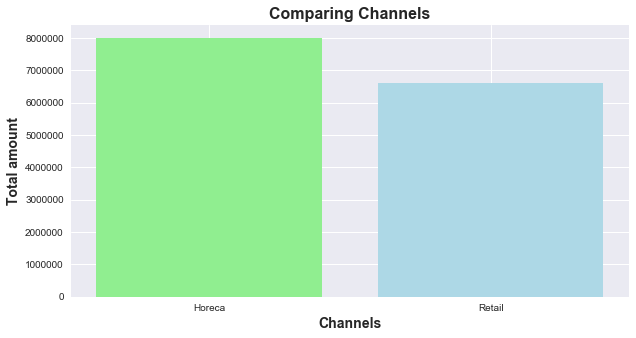

In [157]:
c = data1.groupby('Channel')['Total'].sum()
print(c,'\n')

plt.figure(figsize=(10,5))

plt.bar(c.index,c, color = ['lightgreen','lightblue'])
plt.xlabel('Channels', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.title('Comparing Channels', fontdict={'fontweight': 'bold', 'fontsize': 16})


plt.tight_layout
plt.show()

###### Analysis
Indeed, more have been bought from Horeca channel, but the difference between them is very small if we take into account that the number of Hotel/Restaurant/Cafe is double from the number of retail stores. We suppose that people prefer to buy their products on retail store than on Horeca channel. This may happens due to the fact that products may be cheaper. 

##### Question 6: Calculate the total number of Regions

In [160]:
data1.Region.value_counts()

Other Region    316
Lisbon           77
Porto            47
Name: Region, dtype: int64

###### Analysis
In our dataset we have the two biggest cities of Portugal, Lisbon (77) and Porto (47), but the most clients are spread across the country. 

##### Question 7: Count Retail and Horeca in each kind of region.

In [168]:
r = data1.groupby(['Region','Channel']).size()
r

Region        Channel
Lisbon        Horeca      59
              Retail      18
Other Region  Horeca     211
              Retail     105
Porto         Horeca      28
              Retail      19
dtype: int64

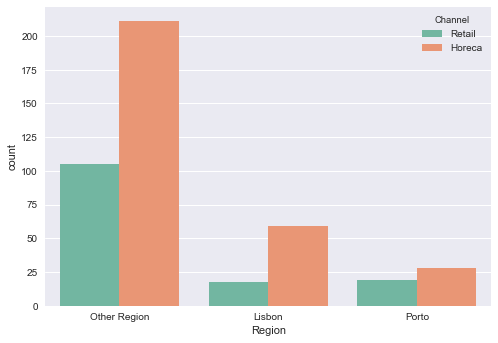

In [173]:
# Plotting
sns.countplot('Region', hue = 'Channel', data = data1, palette='Set2')
plt.show()

##### Question 8: Calculate for each Region the most preferred category of products. 

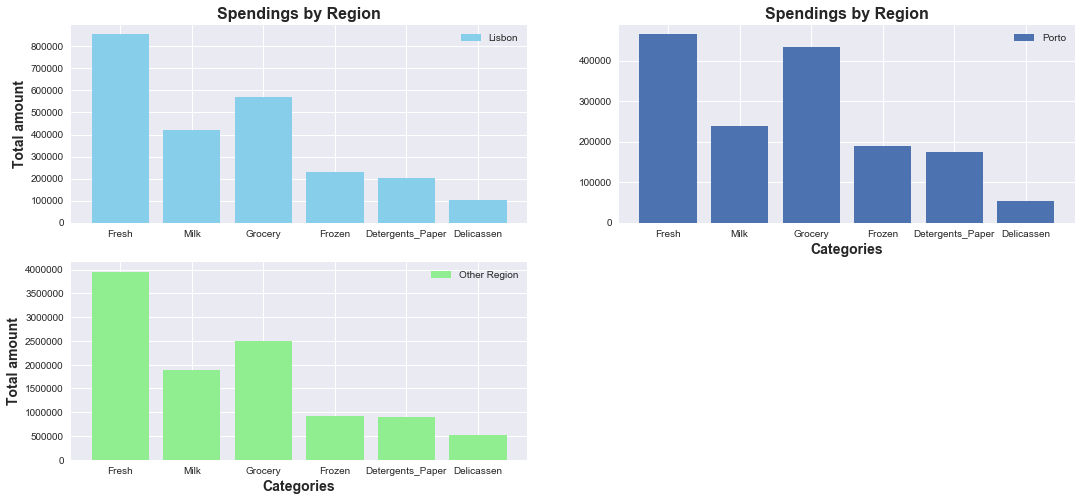

In [206]:
lisbon = data1[data1.Region == 'Lisbon']
l = lisbon.iloc[:,2:-1].sum(axis = 0)

porto = data1[data1.Region == 'Porto']
p = porto.iloc[:,2:-1].sum(axis = 0)

other = data1[data1.Region == 'Other Region']
o = other.iloc[:,2:-1].sum(axis = 0)

# Plotting
plt.figure(figsize=(18,8))

plt.subplot(2, 2, 1)
plt.bar(l.index,l, color = ['skyblue'])
#plt.xlabel('Categories', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.title('Spendings by Region', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.legend(['Lisbon'])

plt.subplot(2, 2, 2)
plt.bar(p.index,p)
plt.xlabel('Categories', fontdict={'fontweight': 'bold', 'fontsize': 14})
#plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.title('Spendings by Region', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.legend(['Porto'])

plt.subplot(2, 2, 3)
plt.bar(o.index,o, color = 'lightgreen')
plt.xlabel('Categories', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
#plt.title('Spendings by Region', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.legend(['Other Region'])


plt.tight_layout
plt.show()

###### Analysis
From the above graphs it is clear that there is the same pattern of sales for all categories across the country. 